# L5

Na tych ćwiczeniach:
    * Omówimy matematycznie podstawowy cel uczenia maszynowego
    * Omówimy ewaluacje
    * Omówimy bias-variance
    * Zdefiniujemy co mamy na myśli mówiąc "regularyzacja"
    * Omówimy związek tradycyjnej regularyzacji z wnioskowaniem Bayesowskim 

Omówiliśmy podejście Bayesowskie, aż do prawdziwego postawienia bayesowskiej regresji liniowej.

Zapomnijmy na chwile o tym wszystkim.

<img width=500 src="figures/L5/plane.jpg">

In [10]:
# Przydatne funkcje

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

# Koncept: dane to losowa próbka

<img width=400 src="figures/L5/the-seventh-seal-chess-game.jpg">

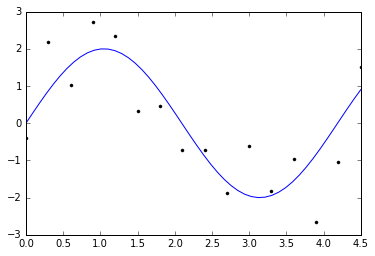

In [31]:
# Dane w regresji
x, y = sample(16)
pl.plot(x, y, 'k.')
pl.plot(f_x, f_y)

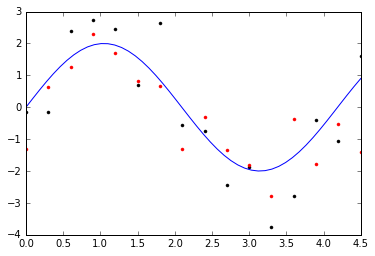

In [36]:
# Inny zbior danych - moglismy tez taki otrzymac!
prev_x, prev_y = x, y
x, y = sample(16)
pl.plot(prev_x, prev_y, 'k.', color='black')
pl.plot(x, y, 'k.', color='r')
pl.plot(f_x, f_y)

# Ewaluacja 

To co nas obchodzi to błąd na nowych danych (z niebieskiej kreski).

Zapiszmy matematycznie podstawowy cel uczenia maszynowego.

$ \mbox{Expected loss} = \mathbb{E}[L] = \int \int L(\textbf{y}, f(\textbf{x})) p(\textbf{x},  \textbf{y}) dx dy $

Chcemy mieć najmniejszy błąd na wszystkich przyszłych zbiorach danych. 

**Cel**: jak aproksymowac ``Expected loss`` ?

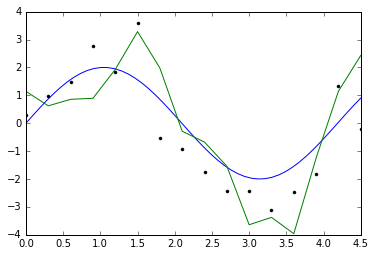

In [40]:
# Tu sie dopasowalismy
X_train, y_train = sample(16)
overfitted_model = fit_polynomial(X_train, y_train, 15)
p_y = apply_polynomial(overfitted_model, X_train)
pl.plot(f_x, f_y)
pl.plot(X_train, y, 'k.')
pl.plot(X_train, p_y)

## Cwiczenie 1 [2pkt] 

(Do zrobienia przed przejściem dalej)

Jaki "Expected loss" będzie miał model "overfitted_model"?

Hint: mamy możliwość samplowania punktów z rozkładu $p(\textbf{x},  \textbf{y})$

## Założenie i.i.d.

Ale zwykle nie mamy dostępu do funkcji "sample". Załóżmy, że nasze dane trenujące (X_train, y_train) są i.i.d. z rozkładu łącznego (X, Y). Wtedy możemy znaleźć przybliżenie "Expected loss"!

## Test set 

Skoro nasze dane są i.i.d., to znaczy że jeśli podzielimy je 2 losowe podzbiory (X_train, y_train) oraz (X_test, y_test) to (X_test, y_test) też będą i.i.d.

Jeśli nie będziemy trenować na X_test, y_test to błąd na zbiorze testującym

$$\mbox{Empirical loss} = \sum_{i=1}^{N} L(\textbf{y_i}, f(\textbf{x_i})) $$

będzie **estymatorem** ``Expected loss`` (definicja estymatora później)

## Cross validation

Estymator ``Empirical loss`` ma dużą wariancję (no bo może akurat wylosowaliśmy prosty zbiór testujący). Aby zmniejszyć jego wariancję możemy losować pare podziałów i uśrednić.

<img src="figures/L3/K-fold_cross_validation_EN.jpg">

## Cwiczenie 1 [1 pkt]

Im więcej podziałów w Cross Validation tym mniejczy czy większy variance estymatora? Odpowiedź uzasadnij.

# Bias variance

(też pojawia się na rozmowach kwalifikacyjnych)

``Expected loss`` można sprytnie rozbić.

Każda rzutka to ``expected loss`` modelu (modele uczone na różnych samplach). Środek to najlepszy model. Od teraz każdy model będziemy rozważać w tych 4 kategoriach.

<img width=350 src="figures/L5/bias_variance.png">

## Poziom 1 wtajemniczenia

1. Samplujemy punkty z rozkładu sinus + szum. 
2. Fitujemy regresje liniową jak na L4 
3. Wracamy do 1 i rysujemy wynik dla paru iteracji

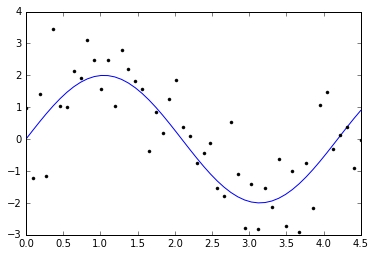

In [6]:
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.')

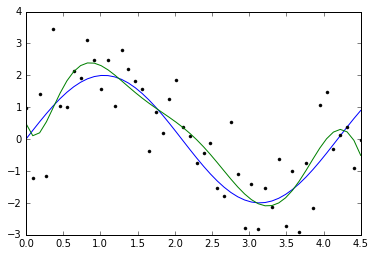

In [7]:
model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y)

## Cwiczenie 1 [2 pkt]

1. Napisz kod, ktory liczy bias, variance oraz MSE dla różnych wartości K.

2. Dla jakich wartości można powiedzieć że mamy model "High variance/low bias"?

Oczekiwany wynik: 

<img src="figures/L5/L5_1_wynik.png">

In [9]:
for k in range(1, 9):
    model = fit_polynomial(x, y, K)
    bias = ...
    variance = ...
    mse = ...
# Plot

SyntaxError: invalid syntax (<ipython-input-9-3d2adfa23168>, line 3)

### Poziom 2 wtajemniczenia

Ref: https://en.wikipedia.org/wiki/Estimator

Mówiliśmy o błędzie modelu. Bias-variance dotyczy *dowolnej estymacji*! (czy to pogody, czy średniej, mwiąc ogólniej dowolnego estymatora)

Zdefiniujmy dowolny estymator, np:

* $mean(x_1, \ldots, x_n) = \frac{1}{n} \sum x_i$
* $cov(x_1, \ldots, x_n) = \frac{1}{n-1} \sum x_i^T x_i$

# Regularyzacja

Regularyzacja zwiększa bias ale zmniejsza variance. Przykład regularyzacji do L1/L2 w regresji liniowej.

## Regularyzacja - podejście "praktyczne"

Zwykle jednak kiedy wymyślamy nowe regularyzacje

## Podejście Bayesowskie a regularyzacja

Wszystko o co chodzi w podejściu Bayesowskim to: "jeśli dobrze zgadnę prior, to na nowych danych powinienem sobie dobrze poradzić". 